1. Download and Access the data

In [2]:
import os
import requests
import zipfile
url = "https://storage.googleapis.com/learning-datasets/horse-or-human.zip"
local_zip = '/tmp/horse-or-human.zip'
os.makedirs('/tmp', exist_ok=True)
print("Downloading file...")
response = requests.get(url)
with open(local_zip, 'wb') as file:
    file.write(response.content)
print("Download completed.")
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

Download completed.


2. Define directories

In [3]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


In [5]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


3. Explore data

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

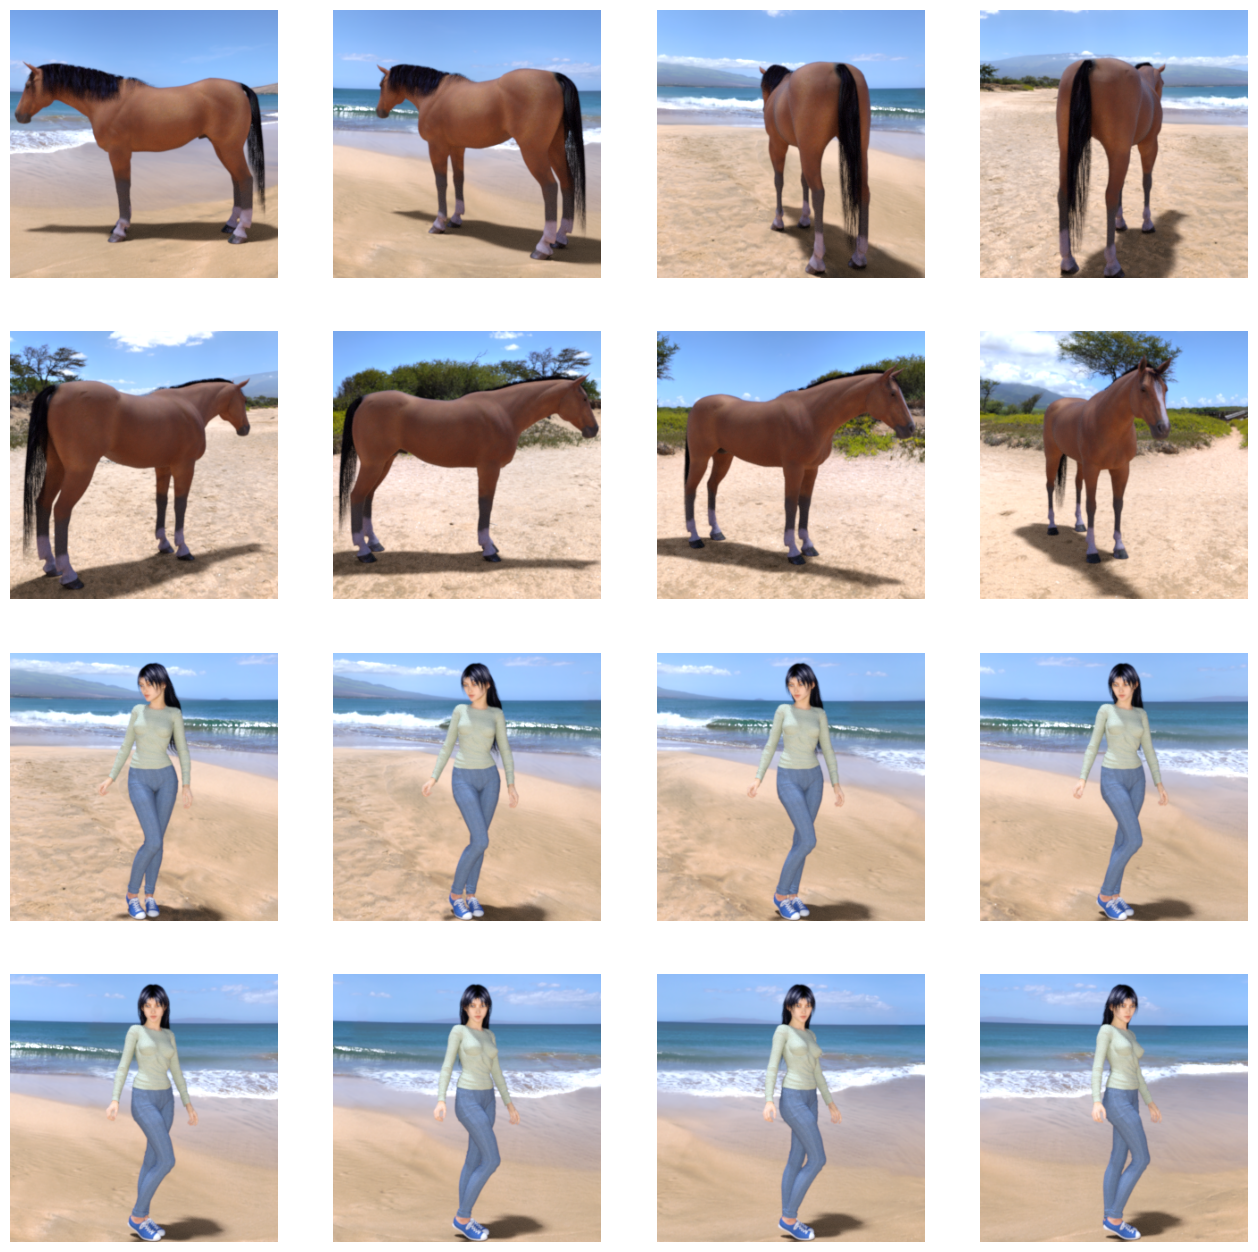

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 20
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


4. Define model


In [8]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

5. Compile the model

In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

6. Train the model

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',
        target_size=(300, 300),
        batch_size=128,
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [12]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1)

Epoch 1/15


8/8 [==============================] - 32s 3s/step - loss: 0.7072 - acc: 0.5205
Epoch 2/15
8/8 [==============================] - 19s 2s/step - loss: 0.6709 - acc: 0.6113
Epoch 3/15
8/8 [==============================] - 16s 2s/step - loss: 0.7156 - acc: 0.6997
Epoch 4/15
8/8 [==============================] - 16s 2s/step - loss: 0.4859 - acc: 0.7809
Epoch 5/15
8/8 [==============================] - 16s 2s/step - loss: 0.3559 - acc: 0.8687
Epoch 6/15
8/8 [==============================] - 16s 2s/step - loss: 0.2950 - acc: 0.8954
Epoch 7/15
8/8 [==============================] - 16s 2s/step - loss: 0.5208 - acc: 0.8877
Epoch 8/15
8/8 [==============================] - 16s 2s/step - loss: 0.3674 - acc: 0.8832
Epoch 9/15
8/8 [==============================] - 16s 2s/step - loss: 0.0991 - acc: 0.9611
Epoch 10/15
8/8 [==============================] - 17s 2s/step - loss: 0.0772 - acc: 0.9711
Epoch 11/15
8/8 [==============================] - 17s 2s/step - loss: 0.4508 - acc: 0.

7. Test the model


Enter the path to the image file: horse.jpeg


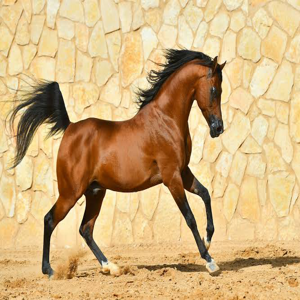

1/1 [==============================] - 1s 907ms/step
[0.]
The image is classified as a horse.


In [15]:
import numpy as np
from keras.preprocessing import image
from PIL import Image
import os

# Assuming you have a function or method to get the image path or upload it locally
# Example function to upload image in a local environment
def upload_image():
    uploaded_file_path = input("Enter the path to the image file: ")
    return uploaded_file_path

uploaded_file_path = upload_image()

if os.path.exists(uploaded_file_path):
    # Display the uploaded image
    display(Image.open(uploaded_file_path).resize((300, 300)))

    # Load and preprocess the image
    img = image.load_img(uploaded_file_path, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Make predictions using your model
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])

    # Display the prediction
    if classes[0] > 0.5:
        print("The image is classified as a human.")
    else:
        print("The image is classified as a horse.")
else:
    print("File not found or path is incorrect.")


8. Save the model

In [16]:
model.save('horse_or_human_model.h5')

C:\Users\gadde\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
